In [2]:
!pip install opencv-python

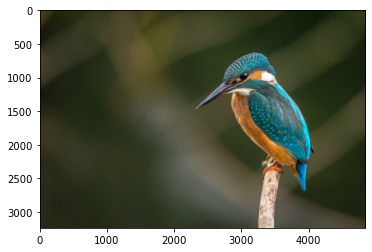

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
img = cv2.cvtColor(cv2.imread('bird.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [4]:
img.shape

(3234, 4844, 3)

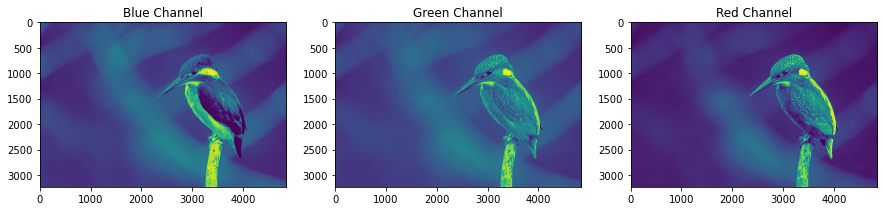

In [5]:
#Splitting into channels
blue,green,red = cv2.split(img)

# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [6]:
blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843
0,83,81,83,81,76,81,85,80,86,80,...,51,51,56,57,54,54,55,55,55,54
1,84,80,83,87,84,86,87,81,89,82,...,52,53,55,53,52,56,54,54,54,54
2,90,81,84,91,89,88,87,83,88,83,...,53,53,54,50,51,57,51,51,52,53
3,91,81,81,87,83,80,81,81,85,86,...,53,50,52,53,54,57,49,50,50,51
4,83,76,79,82,76,72,76,76,81,89,...,52,47,51,58,57,55,51,51,51,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,35,39,40,40,42,42,40,39,43,38,...,71,72,70,71,72,70,73,73,72,72
3230,33,36,37,40,42,39,37,40,37,35,...,71,73,71,71,73,72,75,74,72,71
3231,34,34,33,35,38,34,33,41,34,37,...,73,74,70,69,70,68,73,72,71,71
3232,43,36,40,47,40,34,34,34,38,38,...,68,68,74,74,71,69,64,69,75,77


In [8]:
df_blue = blue/255
df_green = green/255
df_red = red/255
pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(3234, 50)
(3234, 50)
(3234, 50)


In [9]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9543026955895543
Green Channel: 0.9183630371615725
Red Channel  : 0.937917703641063


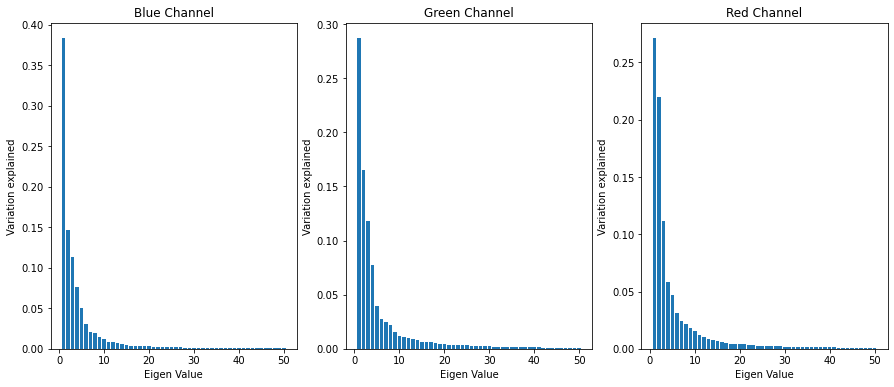

In [10]:
fig = plt.figure(figsize = (15, 6)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()


In [11]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(3234, 4844) (3234, 4844) (3234, 4844)


In [12]:
img_reduced= cv2.merge((b_arr, g_arr, r_arr))
print(img_reduced.shape)

(3234, 4844, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


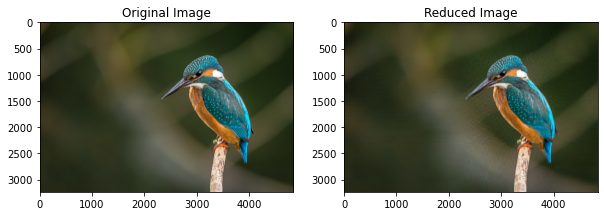

In [13]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()